In [1]:
import matplotlib.pyplot as plt
import pickle
import matplotlib.cm as cm
import numpy as np
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

# 1. Width of Bounds
This figure gives an idea of the width of the bounds for different parameters by looking at the difference between the TDI (upper bound) and the PDI (lower bound).

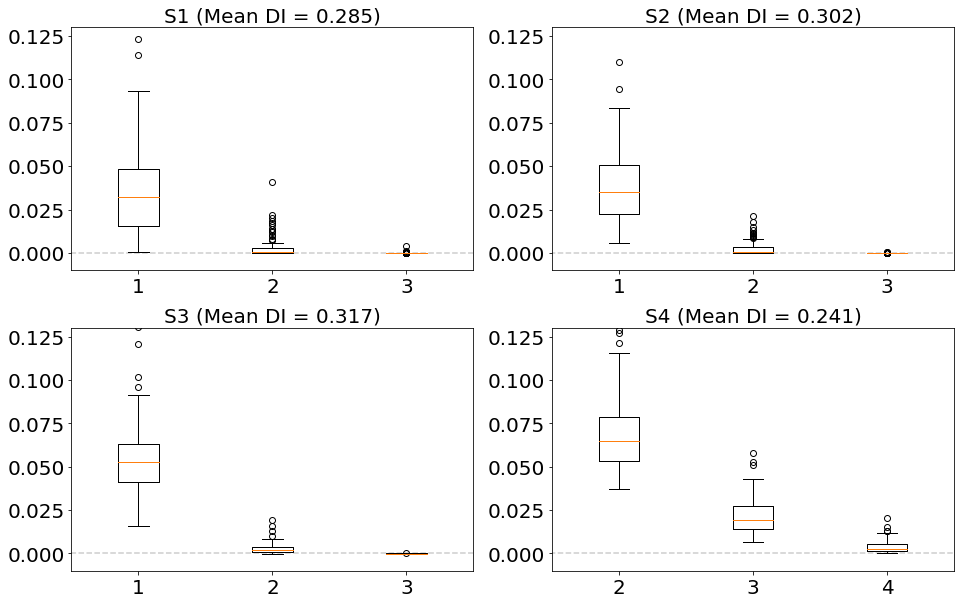

In [2]:
fig,axarr = plt.subplots(2,2,figsize=(13.5,8.5))
farr = ['case1n100.pickle','case2n100.pickle','case3n100.pickle','case4n100.pickle']
titles = ['S1','S2','S3','S4']
for (ax,f,title) in zip(axarr.flatten(),farr,titles):
    (tdis,pdis) = pickle.load(open(f,'rb'))
    
    counts = []
    for n in range(tdis.shape[0]):
        tdi = []
        pdi = []
        for k in range(tdis.shape[1]):
            if tdis[n,k]>0:
                tdi.append(tdis[n,k])
                pdi.append(pdis[n,k])
        counts.append((pdi[-1]+tdi[-1])/2)
    avgdi = np.mean(counts)
    
    ax.plot([-1,5],[0,0],'k--',alpha=0.2)
    ax.boxplot(tdis-pdis)
    if f[4]=='4':
        ax.set_xticklabels([2,3,4])
    ylim = ax.get_ylim()
    ax.set_ylim([-0.01,0.13])
    ax.set_title(title+' (Mean DI = %1.3f)'%avgdi,fontdict={'fontsize': 20})
    plt.tight_layout()

# 2. Trajectory of PDI and TDI as $k$ Increases
This figure looks at how the TDI and PDI evolve as $k$ increases. The dashed lines represent the PDI and the solid lines represent the TDI with each color representing a single selection of model parameters. Notice how the dashed and solid lines converge to each other -- this convergence point is the true DI.

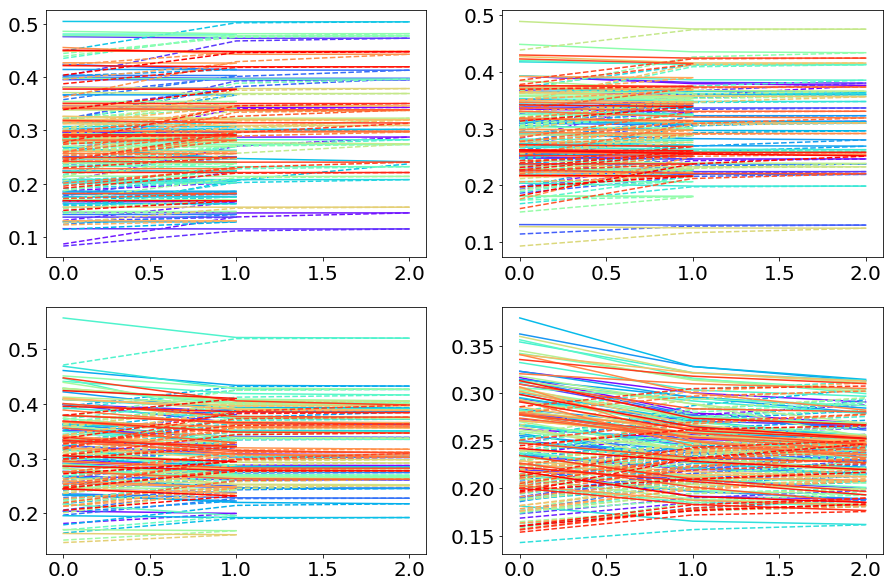

In [3]:
fig,axarr = plt.subplots(2,2,figsize=(15,10))
farr = ['case1n100.pickle','case2n100.pickle','case3n100.pickle','case4n100.pickle']
for (ax,f) in zip(axarr.flatten(),farr):
    (tdis,pdis) = pickle.load(open(f,'rb'))
    cs = cm.rainbow(np.linspace(0, 1, tdis.shape[0]))
    for n in range(len(cs)):
        tdi = []
        pdi = []
        for k in range(tdis.shape[1]):
            if tdis[n,k]>0:tdi.append(tdis[n,k])
            if pdis[n,k]>0:pdi.append(pdis[n,k])
        ax.plot(tdi,color=cs[n])
        ax.plot(pdi,'--',color=cs[n]);

# 3. Histogram of DI Values
This figure gives an idea of how the DI (as calculated by the above congerged upon values) is distributed when the parameters defining the process are distributed uniformly over the probability simplex.

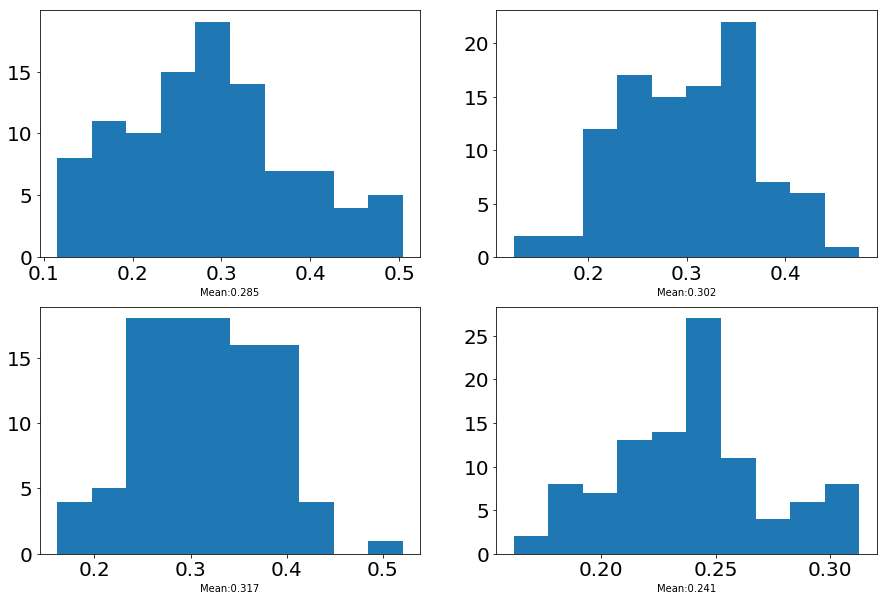

In [4]:
fig,axarr = plt.subplots(2,2,figsize=(15,10))
farr = ['case1n100.pickle','case2n100.pickle','case3n100.pickle','case4n100.pickle']
for (ax,f) in zip(axarr.flatten(),farr):
    (tdis,pdis) = pickle.load(open(f,'rb'))
    cs = cm.rainbow(np.linspace(0, 1, tdis.shape[0]))

    counts = []
    for n in range(tdis.shape[0]):
        tdi = []
        pdi = []
        for k in range(tdis.shape[1]):
            if tdis[n,k]>0:
                tdi.append(tdis[n,k])
                pdi.append(pdis[n,k])
        counts.append((pdi[-1]+tdi[-1])/2)

    ax.hist(counts)
    ax.set_xlabel('Mean:%1.3f'%np.mean(counts))

# 4. Difference Between TDI and DI
This is the figure included in the paper. We see how different the TDI and PDI are from the true DI.

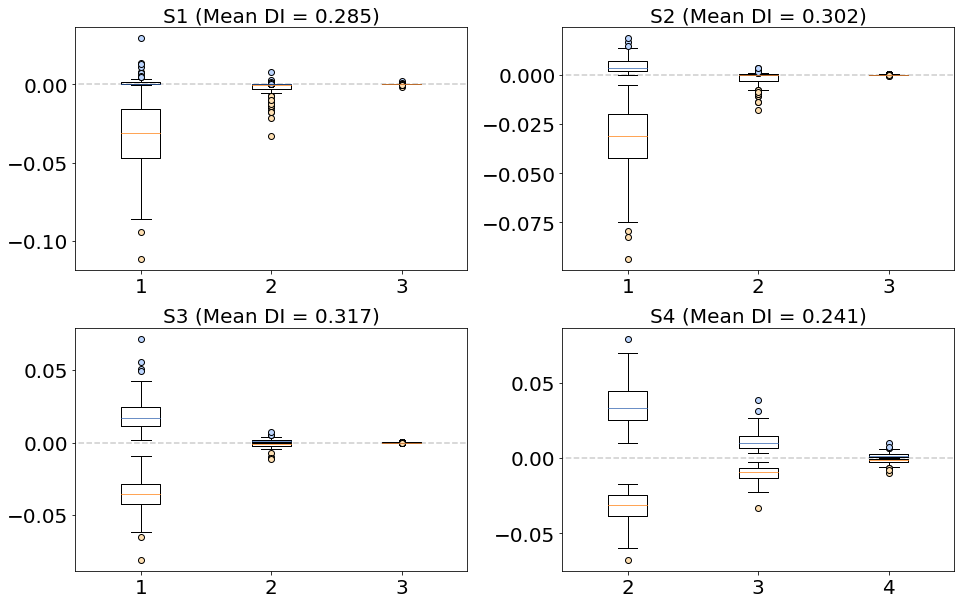

In [5]:
fig,axarr = plt.subplots(2,2,figsize=(13.5,8.5))
farr = ['case1n100.pickle','case2n100.pickle','case3n100.pickle','case4n100.pickle']
titles = ['S1','S2','S3','S4']
for (ax,f,title) in zip(axarr.flatten(),farr,titles):
    (tdis,pdis) = pickle.load(open(f,'rb'))
    
    counts = []
    for n in range(tdis.shape[0]):
        tdi = []
        pdi = []
        for k in range(tdis.shape[1]):
            if tdis[n,k]>0:
                tdi.append(tdis[n,k])
                pdi.append(pdis[n,k])
            else:
                tdis[n,k] = tdi[-1]
                pdis[n,k] = pdi[-1]
        counts.append((pdi[-1]+tdi[-1])/2)
    avgdi = np.mean(counts)
    
    ax.plot([-1,5],[0,0],'k--',alpha=0.2)
    tdip = ax.boxplot(tdis-np.tile(counts,(3,1)).T)
    pdip = ax.boxplot(pdis-np.tile(counts,(3,1)).T)

    #['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(tdip['medians'], color='#2d60af',alpha=0.7)
    plt.setp(tdip["fliers"], markerfacecolor='#bcd6ff')
    plt.setp(pdip['medians'], alpha=0.7)
    plt.setp(pdip["fliers"], markerfacecolor='#ffe0b2')
    
    if f[4]=='4':
        ax.set_xticklabels([2,3,4])
    ylim = ax.get_ylim()
    #ax.set_ylim([-0.01,0.13])
    ax.set_title(title+' (Mean DI = %1.3f)'%avgdi,fontdict={'fontsize': 20})
    plt.tight_layout()